# Workshop - 7 Classical method for Multivariate Time Series

## Import and data

In [1]:
!pip install -U sktime


In [31]:
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd

%matplotlib inline

## Multivariate Series Classification

### DataSet

<font size=4.5pt  face = 'georgia' style='Line-height :3'><div style='text-align: justify; padding:35px; margin-top:-35px; margin-bottom:-35px'>
The dateset <b><u>BasicMotions</u></b>.<br>
The dataset taken <a href="http://www.timeseriesclassification.com/description.php?Dataset=BasicMotions">BasicMotions </a> is the  consists of four classes, which are walking, resting, running and badminton collected by smart watch of students (with 3D accelerometer and a 3D gyroscope). 
<br>Participants were required to record motion a total of five times, and the data is sampled once every tenth of a second, for a ten second period.<br>
The data set was generated as part of a student project where four students performed four activities whilst wearing a smart watch. 

In [5]:
from sklearn.model_selection import train_test_split
from sktime.datasets import load_basic_motions


X, y = load_basic_motions(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60, 6) (60,) (20, 6) (20,)


In [6]:
#  multivariate input data
X_train.head()

,dim_0,dim_1,dim_2,dim_3,dim_4,dim_5
9,0 -0.407421 1 -0.407421 2 2.355158 3...,0 1.413374 1 1.413374 2 -3.928032 3...,0 0.092782 1 0.092782 2 -0.211622 3...,0 -0.066584 1 -0.066584 2 -3.630177 3...,0 0.223723 1 0.223723 2 -0.026634 3...,0 0.135832 1 0.135832 2 -1.946925 3...
24,0 0.383922 1 0.383922 2 -0.272575 3...,0 0.302612 1 0.302612 2 -1.381236 3...,0 -0.398075 1 -0.398075 2 -0.681258 3...,0 0.071911 1 0.071911 2 -0.761725 3...,0 0.175783 1 0.175783 2 -0.114525 3...,0 -0.087891 1 -0.087891 2 -0.503377 3...
5,0 -0.357300 1 -0.357300 2 -0.005055 3...,0 -0.584885 1 -0.584885 2 0.295037 3...,0 -0.792751 1 -0.792751 2 0.213664 3...,0 0.074574 1 0.074574 2 -0.157139 3...,0 0.159802 1 0.159802 2 -0.306288 3...,0 0.023970 1 0.023970 2 1.230478 3...
7,0 -0.352746 1 -0.352746 2 -1.354561 3...,0 0.316845 1 0.316845 2 0.490525 3...,0 -0.473779 1 -0.473779 2 1.454261 3...,0 -0.327595 1 -0.327595 2 -0.269001 3...,0 0.106535 1 0.106535 2 0.021307 3...,0 0.197090 1 0.197090 2 0.460763 3...
34,0 0.052231 1 0.052231 2 -0.54804...,0 -0.730486 1 -0.730486 2 0.70700...,0 -0.518104 1 -0.518104 2 -1.179430 3...,0 -0.159802 1 -0.159802 2 -0.239704 3...,0 -0.045277 1 -0.045277 2 0.023970 3...,0 -0.029297 1 -0.029297 2 0.29829...


<!-- https://keras.io/examples/timeseries/timeseries_classification_from_scratch/ -->

In [7]:
# multi-class target variable
np.unique(y_train)

array(['badminton', 'running', 'standing', 'walking'], dtype=object)

### SKTime methods of classification

<font size=4.5pt  face = 'georgia' style='Line-height :3'><div style='text-align: justify; padding:35px; margin-top:-35px; margin-bottom:-35px'>
Sktime offers three main ways of solving multivariate time series classification problems:<ol>
    <li><b>Concatenation of time series columns into a single long time series column</b> via <code>ColumnConcatenator</code> and apply a <u>univariate classifiers</u> to the concatenated data.
    <li><b>Column-wise ensembling</b> via <code>ColumnEnsembleClassifier</code> in which one classifier is fitted for each time series column as for <u>univariate series and their predictions aggregated after all</u>.
    <li><b>Specific methods for handling multivariate time series data</b>, e.g. <u>finding funding features or representations, like shapelets in multidimensional spaces</u>. 

<!--
def readucr(filename):
    data = np.loadtxt(filename, delimiter="\t")
    y = data[:, 0]
    x = data[:, 1:]
    return x, y.astype(int)
root_url = "https://raw.githubusercontent.com/hfawaz/cd-diagram/master/FordA/"
x_train, y_train = readucr(root_url + "FordA_TRAIN.tsv")
x_test, y_test = readucr(root_url + "FordA_TEST.tsv")
y_train[y_train == -1] = 0
y_test[y_test == -1] = 0
classes = np.unique(np.concatenate((y_train, y_test), axis=0))
print(classes)
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)
plt.figure()
for c in classes:
    c_x_train = x_train[y_train == c]
    plt.plot(c_x_train[0], label="class " + str(c))
plt.legend(loc="best")
plt.show()
plt.close() 
-->

<font size=4.5pt  face = 'georgia' style='Line-height :3'><div style='text-align: justify; padding:35px; margin-top:-35px; margin-bottom:-35px'>
<b>Time series concatenation</b><ul>
    The way of concatenation is to use <code>ColumnConcatenator</code> method. The method can be joined into pipeline with any univariate classifier.

In [24]:
from sktime.transformations.panel.compose import ColumnConcatenator
from sktime.classification.interval_based import TimeSeriesForestClassifier
from sklearn.pipeline import Pipeline

steps = [
    ("concatenate", ColumnConcatenator()),
    ("classify", TimeSeriesForestClassifier(n_estimators=100)),
]
clf = Pipeline(steps)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

1.0

<font size=4.5pt  face = 'georgia' style='Line-height :3'><div style='text-align: justify; padding:35px; margin-top:-35px; margin-bottom:-35px'>
<b>Column ensembling</b><ul>
We can also fit one classifier for each time series column as for univariate, and then aggregated their predictions.<br>
The interface is similar to the familiar <code>ColumnTransformer</code> from <code>sklearn</code>.<br>
Here <code>ColumnEnsembleClassifier</code> allows use differnt estimators for different columns or column subsets of the input. All of them will be transformed separately and the features generated by each transformer will be ensembled to form a single output.

In [19]:
from sktime.classification.compose import ColumnEnsembleClassifier
from sktime.classification.interval_based import RandomIntervalSpectralForest
from sktime.classification.dictionary_based import ContractableBOSS
from sktime.classification.shapelet_based import ROCKETClassifier
from sktime.classification.interval_based import TimeSeriesForestClassifier

clf = ColumnEnsembleClassifier(
    estimators=[
        ("TSF0", TimeSeriesForestClassifier(n_estimators=50), [0]), #column 0
        ("cBOSS1", ContractableBOSS(), [1]), #column 1
        ("cBOSS2", ContractableBOSS(), [2]), #column 2
        ("RISF", RandomIntervalSpectralForest(n_estimators=50), [3]), #column 3
    ]
    
    
)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

1.0

<font size=4.5pt  face = 'georgia' style='Line-height :3'><div style='text-align: justify; padding:35px; margin-top:-35px; margin-bottom:-35px'>
<b>Specific Multivariate classification algorithms</b><ul>
    <b> WEASEL (Word Extraction for Time Series Classification) + MUSE (Multivariate Symbolic Extension)</b>
Here we will use WEASEL transforms time series into feature vectors, using a sliding-window approach, which are then analyzed through a machine learning classifier. The WEASEL method is based on the  BOSS method and its extensions. In MUSE extension of 
  WEASEL a specific technique of Multivariate Symbolic Extension is applied for Multivariate data.

In [28]:
from sktime.classification.dictionary_based import MUSE
from sktime.classification.dictionary_based import WEASEL

muse = MUSE()
muse.fit(X_train, y_train)
muse.score(X_test, y_test)

1.0

<font size=4.5pt  face = 'georgia' style='Line-height :3'><div style='text-align: justify; padding:35px; margin-top:-35px; margin-bottom:-35px'><ul>
Another method is <b>Mr-SEQL</b> which extracts features from each dimension of the data independently using multiple symbolic representations of time series (SAX, SFA). Then the logistic regression is applied for them.

In [30]:
from sktime.classification.shapelet_based import MrSEQLClassifier

clf = MrSEQLClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

1.0

### Exercise 1

<font size=4.5pt  face = 'georgia' style='Line-height :3'><div style='text-align: justify; padding:35px; margin-top:-35px; margin-bottom:-35px'>
1.load japanese_vowels multivariate dataset <code>load_japanese_vowels</code> and try to use classifiers learned above to this data.

## Multivariate Time Series Forecasting using Vector AutoRegression

### Dataset

<font size=4.5pt  face = 'georgia' style='Line-height :3'><div style='text-align: justify; padding:35px; margin-top:-35px; margin-bottom:-35px'>
VAR (vector autoregression) is the special case of AR based methods for multivariate data (see ARMA Workshop).

<font size=4.5pt  face = 'georgia' style='Line-height :3'><div style='text-align: justify; padding:35px; margin-top:-35px; margin-bottom:-35px'>
Here we will use data set of emperical investigation of inflation, taken <a href="https://www.machinelearningplus.com/time-series/vector-autoregression-examples-python/">hear</a>.

In [165]:
filepath = 'https://raw.githubusercontent.com/selva86/datasets/master/Raotbl6.csv'
df = pd.read_csv(filepath, parse_dates=['date'], index_col='date')
print(df.shape)  # (123, 8)
df.tail()

(123, 8)


,rgnp,pgnp,ulc,gdfco,gdf,gdfim,gdfcf,gdfce
date,,,,,,,,
1988-07-01,4042.7,3971.9,179.6,131.5,124.9,106.2,123.5,92.8
1988-10-01,4069.4,3995.8,181.3,133.3,126.2,107.3,124.9,92.9
1989-01-01,4106.8,4019.9,184.1,134.8,127.7,109.5,126.6,94.0
1989-04-01,4132.5,4044.1,186.1,134.8,129.3,111.1,129.0,100.6
1989-07-01,4162.9,4068.4,187.4,137.2,130.2,109.8,129.9,98.2


<font size=4.5pt  face = 'georgia' style='Line-height :3'><div style='text-align: justify; padding:35px; margin-top:-35px; margin-bottom:-35px'>
    Let's investigate it and visualize.

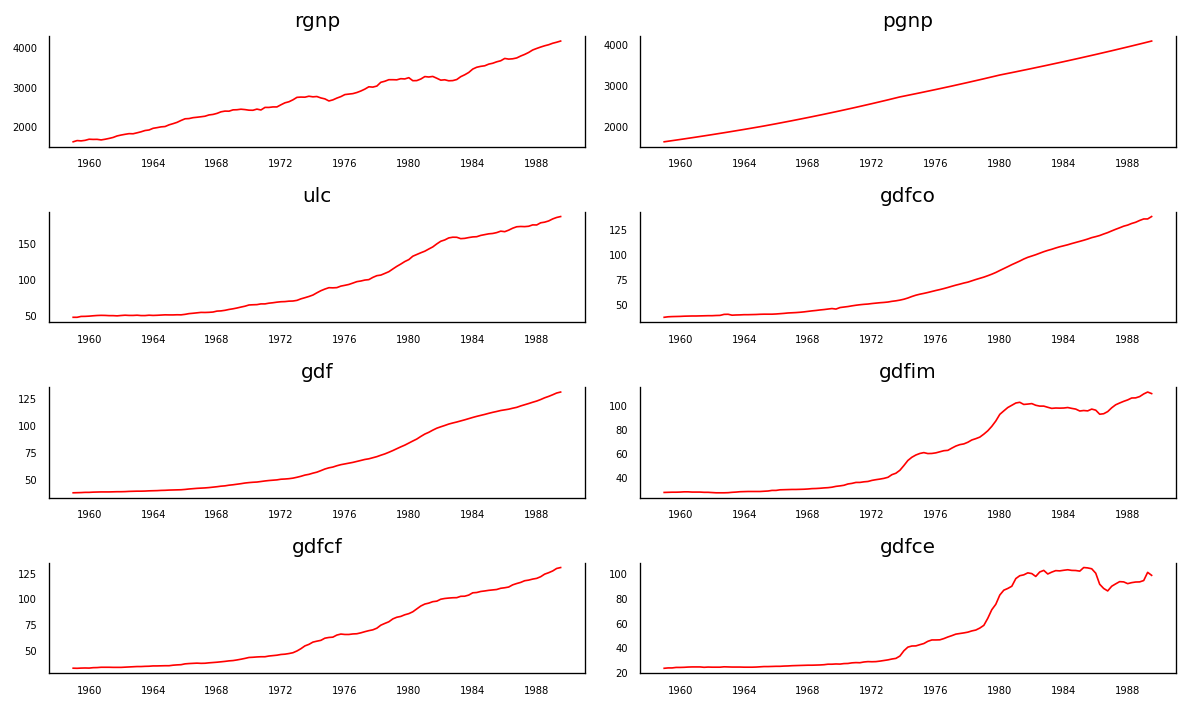

In [166]:
# Plot
fig, axes = plt.subplots(nrows=4, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

<font size=4.5pt  face = 'georgia' style='Line-height :3'><div style='text-align: justify; padding:35px; margin-top:-35px; margin-bottom:-35px'>
In addition we can to check for causality amongst these series by the Granger’s Causality test and the Cointegration test.<ul>
    The presence of the causality means influences of one series on next values of other series (One series behavior is the reason of other series delayed behavior). In the of causality for any series you can predict the series with past values of itself along with other series in the system.

In [167]:
from statsmodels.tsa.stattools import grangercausalitytests

maxlag=12
test = 'ssr_chi2test'

def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """
    Check Granger Causality of all possible combinations of the Time series.
        The rows are the response variable, columns are predictors. The values in the table 
        are the P-Values.
        P-Values lesser than the significance level (0.05), i
        mplies the Null Hypothesis that the coefficients 
        of the corresponding past values is zero, that is, 
        the X does not cause Y can be rejected.

    Paramteres
    ------------
    data : pandas dataframe,
         containing the time series variables.
    variables : list,
         containing names of the time series variables.
    
    Returns
    ----------
    casual matrx: pandas dataframe,
        matrix with p-values.
    
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    
    for c in df.columns:
        
        for r in df.index:
            
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            
            if verbose: 
                print(f'Y = {r}, X = {c}, P Values = {p_values}')
            
            min_p_value = np.min(p_values)
            
            df.loc[r, c] = int(100*min_p_value)/100 #for rounding to second sign after dot.
    
    df.columns = [var + '_x' for var in variables]
    
    df.index   = [var + '_y' for var in variables]
    
    return df

grangers_causation_matrix(df, variables = df.columns) 

,rgnp_x,pgnp_x,ulc_x,gdfco_x,gdf_x,gdfim_x,gdfcf_x,gdfce_x
rgnp_y,1.0,0.00,0.0,0.02,0.0,0.06,0.0,0.0
pgnp_y,0.0,1.00,0.0,0.00,0.0,0.00,0.0,0.0
ulc_y,0.0,0.00,1.0,0.00,0.0,0.00,0.0,0.0
gdfco_y,0.0,0.00,0.0,1.00,0.0,0.00,0.0,0.0
gdf_y,0.0,0.00,0.0,0.00,1.0,0.00,0.0,0.0
gdfim_y,0.0,0.00,0.0,0.00,0.0,1.00,0.0,0.0
gdfcf_y,0.0,0.00,0.0,0.00,0.0,0.00,1.0,0.0
gdfce_y,0.0,0.04,0.0,0.00,0.0,0.00,0.0,1.0


<font size=4.5pt  face = 'georgia' style='Line-height :3'><div style='text-align: justify; padding:35px; margin-top:-35px; margin-bottom:-35px'>
So we see here the all variables have Causality (p-value less than significance level of 0.05 - thus we reject the null hypothesis of its independence). 
    <br> In other words  all the variables (time series) in the system are interchangeably causing each other.<br>
    This allows for using VAR models to forecast this system of time series.

<font size=4.5pt  face = 'georgia' style='Line-height :3'><div style='text-align: justify; padding:35px; margin-top:-35px; margin-bottom:-35px'> In addition we will test our system on the cointegration test.
 Cointegration test.   helps to establish the presence of a statistically significant connection between two or more time series.<br>
    When two or more time series are cointegrated, it means they have a long run, statistically significant relationship.<br>
    

In [168]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(df)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
rgnp   ::  248.0     > 143.6691  =>   True
pgnp   ::  183.12    > 111.7797  =>   True
ulc    ::  130.01    > 83.9383   =>   True
gdfco  ::  85.28     > 60.0627   =>   True
gdf    ::  55.05     > 40.1749   =>   True
gdfim  ::  31.59     > 24.2761   =>   True
gdfcf  ::  14.06     > 12.3212   =>   True
gdfce  ::  0.45      > 4.1296    =>   False


<font size=4.5pt  face = 'georgia' style='Line-height :3'><div style='text-align: justify; padding:35px; margin-top:-35px; margin-bottom:-35px'> 
So all beside the last series can be Cointegrated.<br>

<font size=4.5pt  face = 'georgia' style='Line-height :3'><div style='text-align: justify; padding:35px; margin-top:-35px; margin-bottom:-35px'> 
let's make train-test split

In [298]:
TEST_SIZE = 20
df_train, df_test = df[0:-TEST_SIZE], df[-TEST_SIZE:]

# Check size
print(df_train.shape)  #
print(df_test.shape)  #

(103, 8)
(20, 8)


<font size=4.5pt  face = 'georgia' style='Line-height :3'><div style='text-align: justify; padding:35px; margin-top:-35px; margin-bottom:-35px'> 
For make var we are also need to check our series on stationary.<br>
It is obvious that original series is non-stationary, and we can make difference (actually double difference) for lead the time series to a stationary.
    

In [299]:
df_differenced  = df_train.diff().diff().dropna()
df_differenced.shape

(101, 8)

In [300]:
from statsmodels.tsa.stattools import adfuller

def adfuller_test(series, signif=0.05, name='', verbose=False):
   
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
#     print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
#     print(f' Significance Level    = {signif}')
#     print(f' Test Statistic        = {output["test_statistic"]}')
#     print(f' No. Lags Chosen       = {output["n_lags"]}')

#     for key,val in r[4].items():
#         print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")    
        

In [301]:

for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "rgnp" 
    -----------------------------------------------
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "pgnp" 
    -----------------------------------------------
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "ulc" 
    -----------------------------------------------
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "gdfco" 
    -----------------------------------------------
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "gdf" 
    -----------------------------------------------
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "gdfim" 
    -----------------------------------------------
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Seri

### Forecast task

<font size=4.5pt  face = 'georgia' style='Line-height :3'><div style='text-align: justify; padding:35px; margin-top:-35px; margin-bottom:-35px'> 
Let's search for the best order of VAR model for our series df_stat.

In [302]:
from statsmodels.tsa.api import VAR
from statsmodels.tools.eval_measures import rmse, aic

model = VAR(df_differenced)

orders_grid = range(1,11)

for order in orders_grid:
    result = model.fit(maxlags=order)
    print('Lag Order =', order, end = ' \t' )
    print('AIC : ', (result.aic * 100)//100 , end = ' \t' )
    print('BIC : ', (result.bic* 100)//100 , end = ' \t' )
    print('HQIC: ', (result.hqic* 100)//100 , end = ' \n' )

Lag Order = 1 	AIC :  -3.0 	BIC :  -1.0 	HQIC:  -2.0 
Lag Order = 2 	AIC :  -3.0 	BIC :  0.0 	HQIC:  -2.0 
Lag Order = 3 	AIC :  -4.0 	BIC :  2.0 	HQIC:  -1.0 
Lag Order = 4 	AIC :  -4.0 	BIC :  3.0 	HQIC:  -1.0 
Lag Order = 5 	AIC :  -4.0 	BIC :  5.0 	HQIC:  -1.0 
Lag Order = 6 	AIC :  -5.0 	BIC :  5.0 	HQIC:  -1.0 
Lag Order = 7 	AIC :  -7.0 	BIC :  6.0 	HQIC:  -2.0 
Lag Order = 8 	AIC :  -7.0 	BIC :  7.0 	HQIC:  -2.0 
Lag Order = 9 	AIC :  -11.0 	BIC :  5.0 	HQIC:  -4.0 
Lag Order = 10 	AIC :  -17.0 	BIC :  1.0 	HQIC:  -10.0 


C:\Users\Администратор\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


<font size=4.5pt  face = 'georgia' style='Line-height :3'><div style='text-align: justify; padding:35px; margin-top:-35px; margin-bottom:-35px'> 
Here we can choose lag 10 due to the minimal AIC and BIC criterion.<br>
    An alternate method to choose the order(p) of the VAR models is to use the <code>model.select_order(maxlags)</code> method.
The selected order(p) is the order that gives the lowest measures scores.

In [303]:
x = model.select_order(maxlags=10)
x.summary()

,AIC,BIC,FPE,HQIC
0,-0.7825,-0.5618*,0.4572,-0.6935
1,-1.329,0.6573,0.2660,-0.5278
2,-1.838,1.914,0.1649,-0.3243
3,-2.386,3.133,0.1033,-0.1595
4,-2.985,4.299,0.06663,-0.04639
5,-3.073,5.977,0.08079,0.5779
6,-4.510,6.306,0.03040,-0.1461
7,-5.907,6.675,0.01558,-0.8308
8,-7.107,7.241,0.01497,-1.319
9,-10.43,5.683,0.003734,-3.930


<font size=4.5pt  face = 'georgia' style='Line-height :3'><div style='text-align: justify; padding:35px; margin-top:-35px; margin-bottom:-35px'>
Here we are also can choose lag  10.<br>
    let's make fitting and forecasting

In [304]:
model_fitted = model.fit(10)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 06, May, 2021
Time:                     13:29:06
--------------------------------------------------------------------
No. of Equations:         8.00000    BIC:                    1.55401
Nobs:                     91.0000    HQIC:                  -9.11225
Log likelihood:           357.824    FPE:                0.000406468
AIC:                     -16.3255    Det(Omega_mle):     2.49534e-06
--------------------------------------------------------------------
Results for equation rgnp
               coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------
const            10.961108         8.108555            1.352           0.176
L1.rgnp          -0.289441         0.437760           -0.661           0.508
L1.pgnp           1.766595        15.395450            0.115           0.909


limit_output extension: Maximum message size of 10000 exceeded with 54027 characters

<font size=4.5pt  face = 'georgia' style='Line-height :3'><div style='text-align: justify; padding:35px; margin-top:-35px; margin-bottom:-35px'>
For the obtained model we can check on some left patterns in the residuals using durbin_watson test.<br>
    For this test the value of this statistic can vary between 0 and 4. The closer it is to the value 2, then there is no significant serial correlation. The closer to 0, there is a positive serial correlation, and the closer it is to 4 implies negative serial correlation.

In [305]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

print(out)

[2.48414886 2.12539032 1.87510872 2.70538591 1.82807508 2.67882018
 1.69115062 2.23853132]


<font size=4.5pt  face = 'georgia' style='Line-height :3'><div style='text-align: justify; padding:35px; margin-top:-35px; margin-bottom:-35px'>
    Probably model work quite well.

<font size=4.5pt  face = 'georgia' style='Line-height :3'><div style='text-align: justify; padding:35px; margin-top:-35px; margin-bottom:-35px'>
    Now we will make forecast.
    For first forecasted (out-of-samples) value we need to take last <code>lag_order</code> values of our training data.
    <br>Because this amount of data need to make one step further forecast.

In [306]:
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  #7

# Input data for forecasting
forecast_input = df_differenced.values[-lag_order:]
forecast_input.shape

10


(10, 8)

<font size=4.5pt  face = 'georgia' style='Line-height :3'><div style='text-align: justify; padding:35px; margin-top:-35px; margin-bottom:-35px'>
    Now we can make forecast.

In [308]:
# Forecast
fc = model_fitted.forecast(y=forecast_input, steps=TEST_SIZE)

df_forecast = pd.DataFrame(fc, index=df.index[-TEST_SIZE:], columns=df.columns + '_2d')

df_forecast

,rgnp_2d,pgnp_2d,ulc_2d,gdfco_2d,gdf_2d,gdfim_2d,gdfcf_2d,gdfce_2d
date,,,,,,,,
1984-10-01,-254.223407,0.794179,3.635249,-2.090034,-1.231496,-3.999701,-3.542227,-10.426202
1985-01-01,545.492461,-2.869124,-15.802553,-0.348122,0.028494,2.459419,6.994432,10.242797
1985-04-01,-428.584066,4.186865,13.625643,-1.246798,0.305369,-4.685231,-6.051656,-11.254760
1985-07-01,140.682735,1.904957,-9.044991,2.859512,-1.231346,-0.214502,0.275311,6.465466
1985-10-01,393.312114,1.745448,-5.334634,-3.801062,0.604795,2.523042,7.823499,-5.560102
1986-01-01,-431.430526,3.094269,9.248289,2.467791,-0.068532,-0.623337,-9.235718,7.659798
1986-04-01,211.462016,-2.870648,-5.645376,1.704179,-0.418001,3.685622,3.883849,9.996336
1986-07-01,-319.855266,2.616225,12.554721,-3.826439,0.219042,0.617610,-0.370686,-25.651486
1986-10-01,638.529366,-4.189477,-22.001288,3.701743,0.202896,6.943042,3.488349,32.252237


In [309]:
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc


df_results = invert_transformation(df_train, df_forecast, second_diff=True)        
df_results.loc[:, ['rgnp_forecast', 'pgnp_forecast', 'ulc_forecast', 'gdfco_forecast',
                   'gdf_forecast', 'gdfim_forecast', 'gdfcf_forecast', 'gdfce_forecast']]

,rgnp_forecast,pgnp_forecast,ulc_forecast,gdfco_forecast,gdf_forecast,gdfim_forecast,gdfcf_forecast,gdfce_forecast
date,,,,,,,,
1984-10-01,3288.976593,3630.694179,166.635249,109.409966,108.368504,92.700299,104.157773,91.273798
1985-01-01,3602.845646,3650.219233,156.267944,108.171809,108.065502,90.460017,108.609978,90.590394
1985-04-01,3488.130634,3673.931152,159.526282,105.686854,108.067869,83.534504,107.010527,78.652230
1985-07-01,3514.098356,3699.548028,153.739629,106.061412,106.838890,76.394488,105.686387,73.179532
1985-10-01,3933.378192,3726.910352,142.618342,102.634908,106.214706,71.777514,112.185746,62.146732
1986-01-01,3921.227502,3757.366944,140.745343,101.676194,105.521991,66.537204,109.449386,58.773730
1986-04-01,4120.538828,3784.952889,133.226968,102.421660,104.411275,64.982516,110.596876,65.397065
1986-07-01,3999.994889,3815.155058,138.263313,99.340687,103.519600,64.045438,111.373680,46.368913
1986-10-01,4517.980314,3841.167750,121.298371,99.961457,102.830822,70.051402,115.638832,59.592999


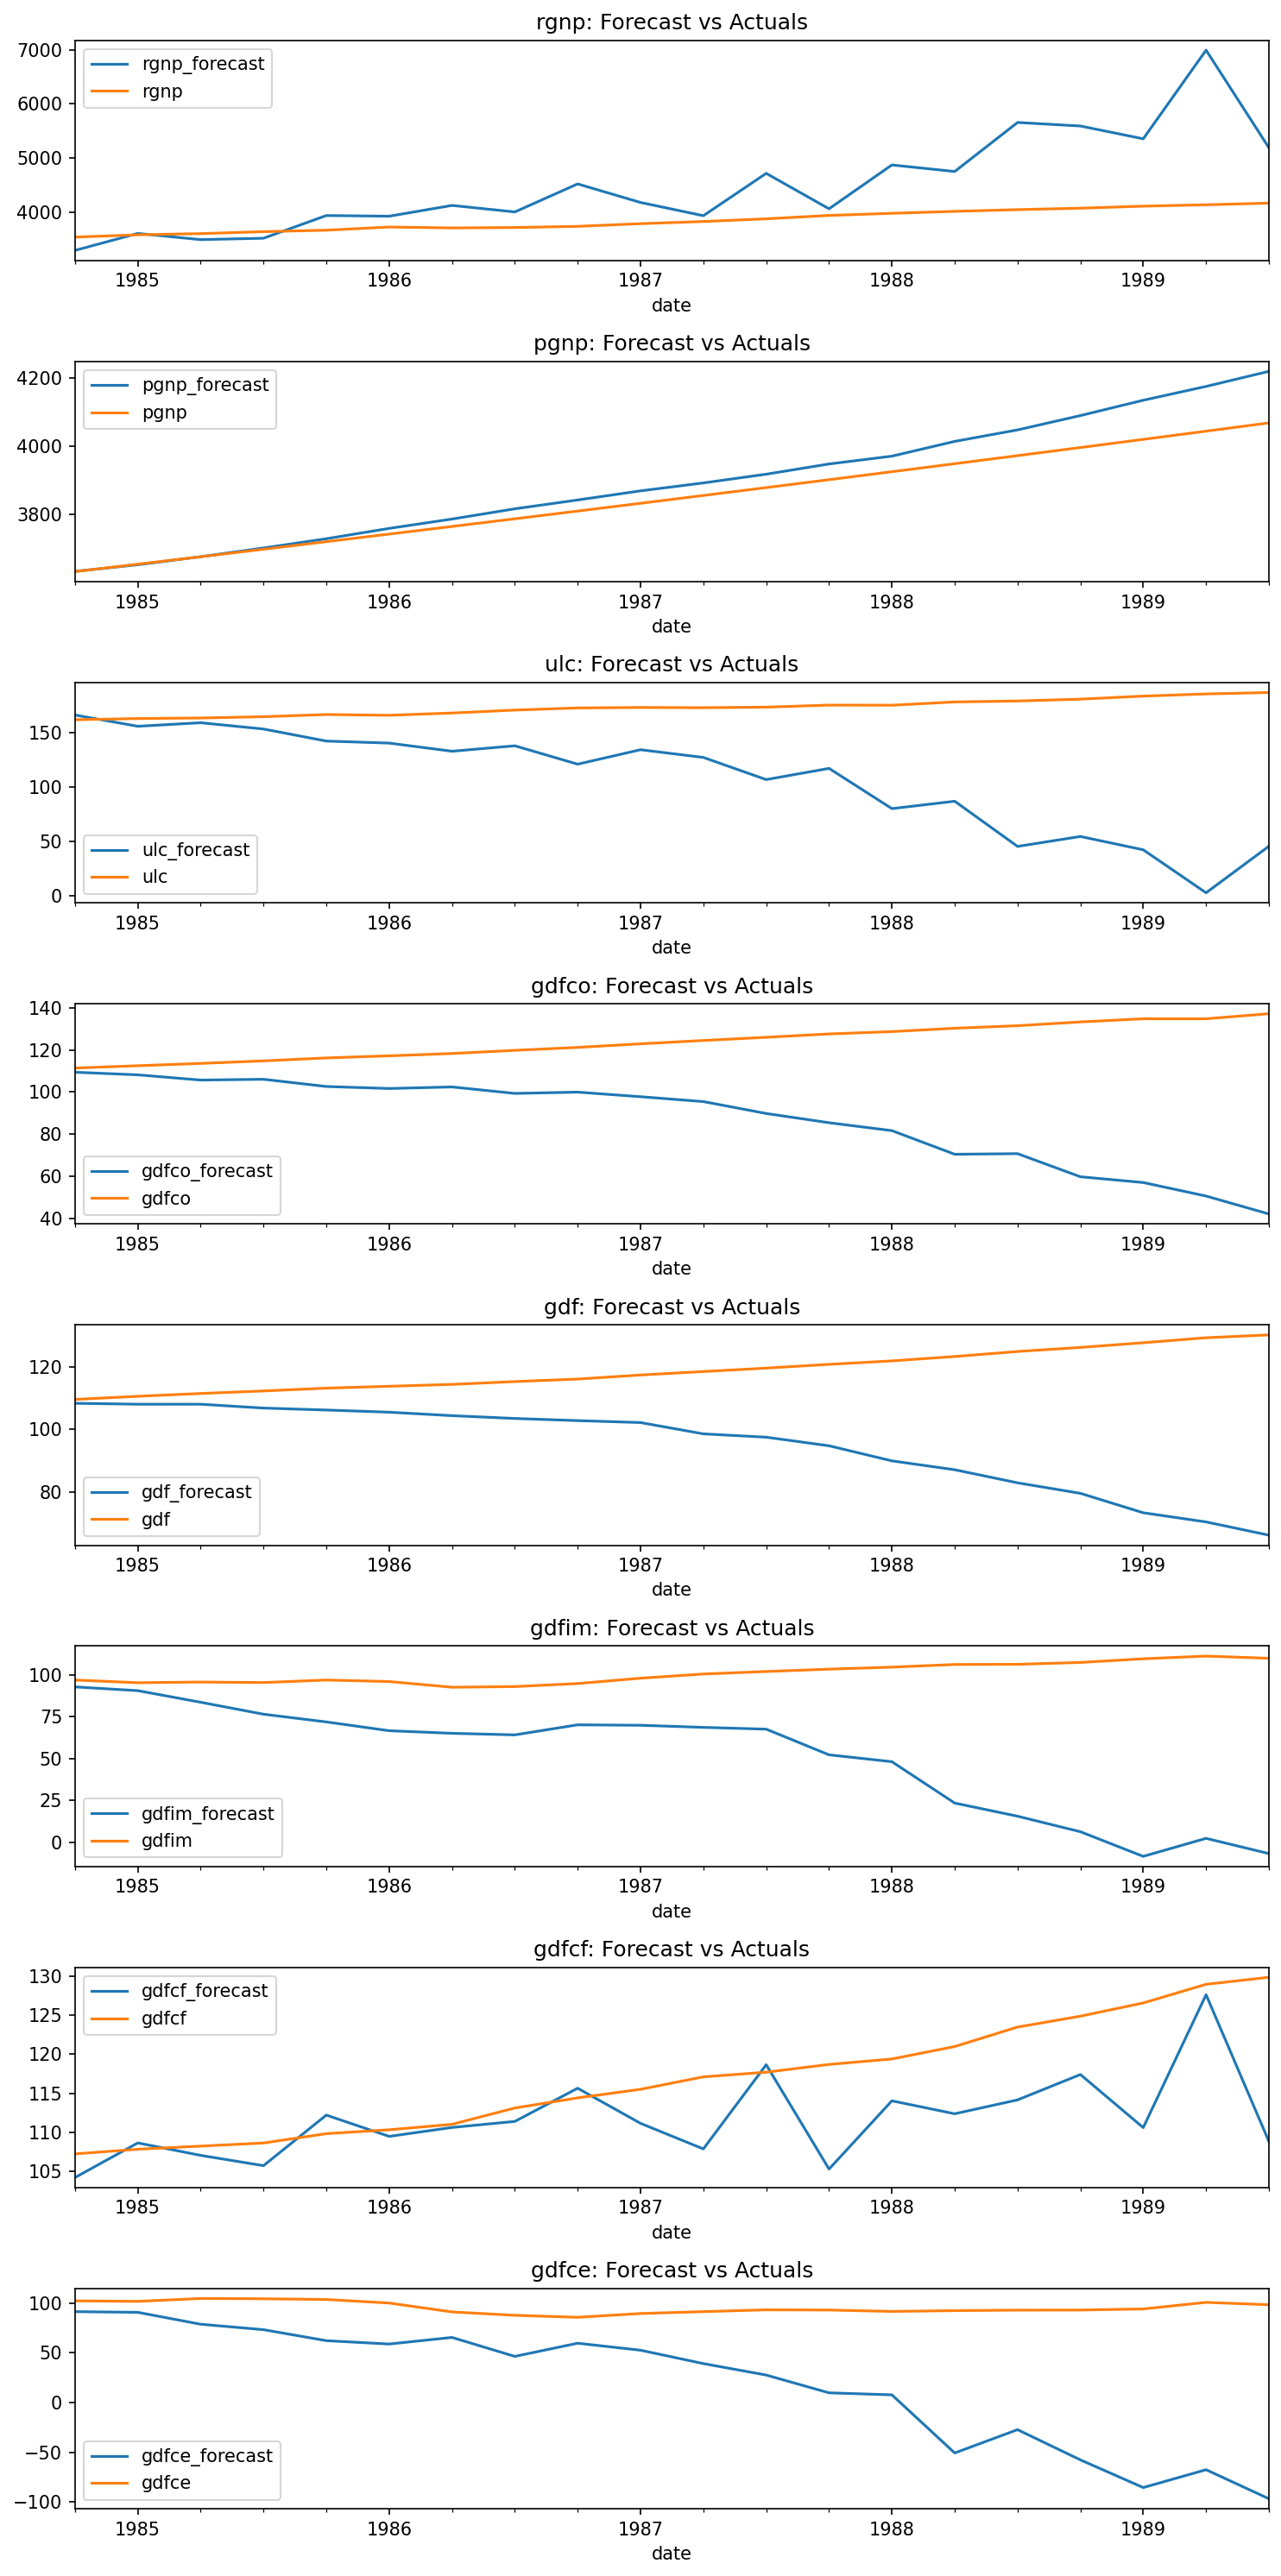

In [310]:


fig, axes = plt.subplots(nrows=len(df.columns), ncols=1, dpi=150, figsize=(10,20))

for i, (col,ax) in enumerate(zip(df.columns, axes)):
    
    df_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    
    df_test[col][-TEST_SIZE:].plot(legend=True, ax=ax);
    
    ax.set_title(col + ": Forecast vs Actuals")


plt.tight_layout();

<font size=4.5pt  face = 'georgia' style='Line-height :3'><div style='text-align: justify; padding:35px; margin-top:-35px; margin-bottom:-35px'>
    In addition we can estimate result accuracy by measures.

In [311]:
def forecast_accuracy(forecast, actual):
    
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    
#     me = np.mean(forecast - actual)             # ME
    
#     mae = np.mean(np.abs(forecast - actual))    # MAE
    
#     mpe = np.mean((forecast - actual)/actual)   # MPE
    
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    
    minmax = 1 - np.mean(mins/maxs)             # minmax
    
    return({'mape':mape, 
#             'me':me, 
#             'mae': mae, 
#             'mpe': mpe, 
            'rmse':rmse, 'corr':corr, 'minmax':minmax})

print('Forecast Accuracy of: rgnp')
accuracy_prod = forecast_accuracy(df_results['rgnp_forecast'].values, df_test['rgnp'])
for k, v in accuracy_prod.items():
    print(k, '\t : ', round(v,4), end='\t')

print('\nForecast Accuracy of: pgnp')
accuracy_prod = forecast_accuracy(df_results['pgnp_forecast'].values, df_test['pgnp'])
for k, v in accuracy_prod.items():
    print(k, '\t : ', round(v,4), end='\t')

print('\nForecast Accuracy of: ulc')
accuracy_prod = forecast_accuracy(df_results['ulc_forecast'].values, df_test['ulc'])
for k, v in accuracy_prod.items():
    print(k, '\t : ', round(v,4), end='\t')

print('\nForecast Accuracy of: gdfco')
accuracy_prod = forecast_accuracy(df_results['gdfco_forecast'].values, df_test['gdfco'])
for k, v in accuracy_prod.items():
    print(k, '\t : ', round(v,4), end='\t')

print('\nForecast Accuracy of: gdf')
accuracy_prod = forecast_accuracy(df_results['gdf_forecast'].values, df_test['gdf'])
for k, v in accuracy_prod.items():
    print(k, '\t : ', round(v,4), end='\t')

print('\nForecast Accuracy of: gdfim')
accuracy_prod = forecast_accuracy(df_results['gdfim_forecast'].values, df_test['gdfim'])
for k, v in accuracy_prod.items():
    print(k, '\t : ', round(v,4), end='\t')

print('\nForecast Accuracy of: gdfcf')
accuracy_prod = forecast_accuracy(df_results['gdfcf_forecast'].values, df_test['gdfcf'])
for k, v in accuracy_prod.items():
    print(k, '\t : ', round(v,4), end='\t')

print('\nForecast Accuracy of: gdfce')
accuracy_prod = forecast_accuracy(df_results['gdfce_forecast'].values, df_test['gdfce'])
for k, v in accuracy_prod.items():
    print(k, '\t : ', round(v,4), end='\t')


Forecast Accuracy of: rgnp
mape 	 :  0.1735	rmse 	 :  973.9519	corr 	 :  0.8749	minmax 	 :  0.1336	
Forecast Accuracy of: pgnp
mape 	 :  0.0121	rmse 	 :  64.8452	corr 	 :  0.9964	minmax 	 :  0.0118	
Forecast Accuracy of: ulc
mape 	 :  0.3694	rmse 	 :  84.6745	corr 	 :  -0.9424	minmax 	 :  0.3693	
Forecast Accuracy of: gdfco
mape 	 :  0.286	rmse 	 :  46.5543	corr 	 :  -0.9492	minmax 	 :  0.286	
Forecast Accuracy of: gdf
mape 	 :  0.194	rmse 	 :  30.9204	corr 	 :  -0.9757	minmax 	 :  0.194	
Forecast Accuracy of: gdfim
mape 	 :  0.4762	rmse 	 :  62.3369	corr 	 :  -0.8948	minmax 	 :  0.4762	
Forecast Accuracy of: gdfcf
mape 	 :  0.0462	rmse 	 :  7.9659	corr 	 :  0.5428	minmax 	 :  0.0461	
Forecast Accuracy of: gdfce
mape 	 :  0.8072	rmse 	 :  96.5182	corr 	 :  0.1955	minmax 	 :  0.8072	

### Exercise 2



<font size=4.5pt  face = 'georgia' style='Line-height :3'><div style='text-align: justify; padding:35px; margin-top:-35px; margin-bottom:-35px'>
1.    As you can notice it is hard to find the best model for all series in the system especially on the relatively long horizon.<br>
    The Task is: thy to vary the order of VAR and find the beset one for test dataset.
    
2. (advanced) try to make some standardization or normalization before VAR analysis, and see how it would affect on the results.